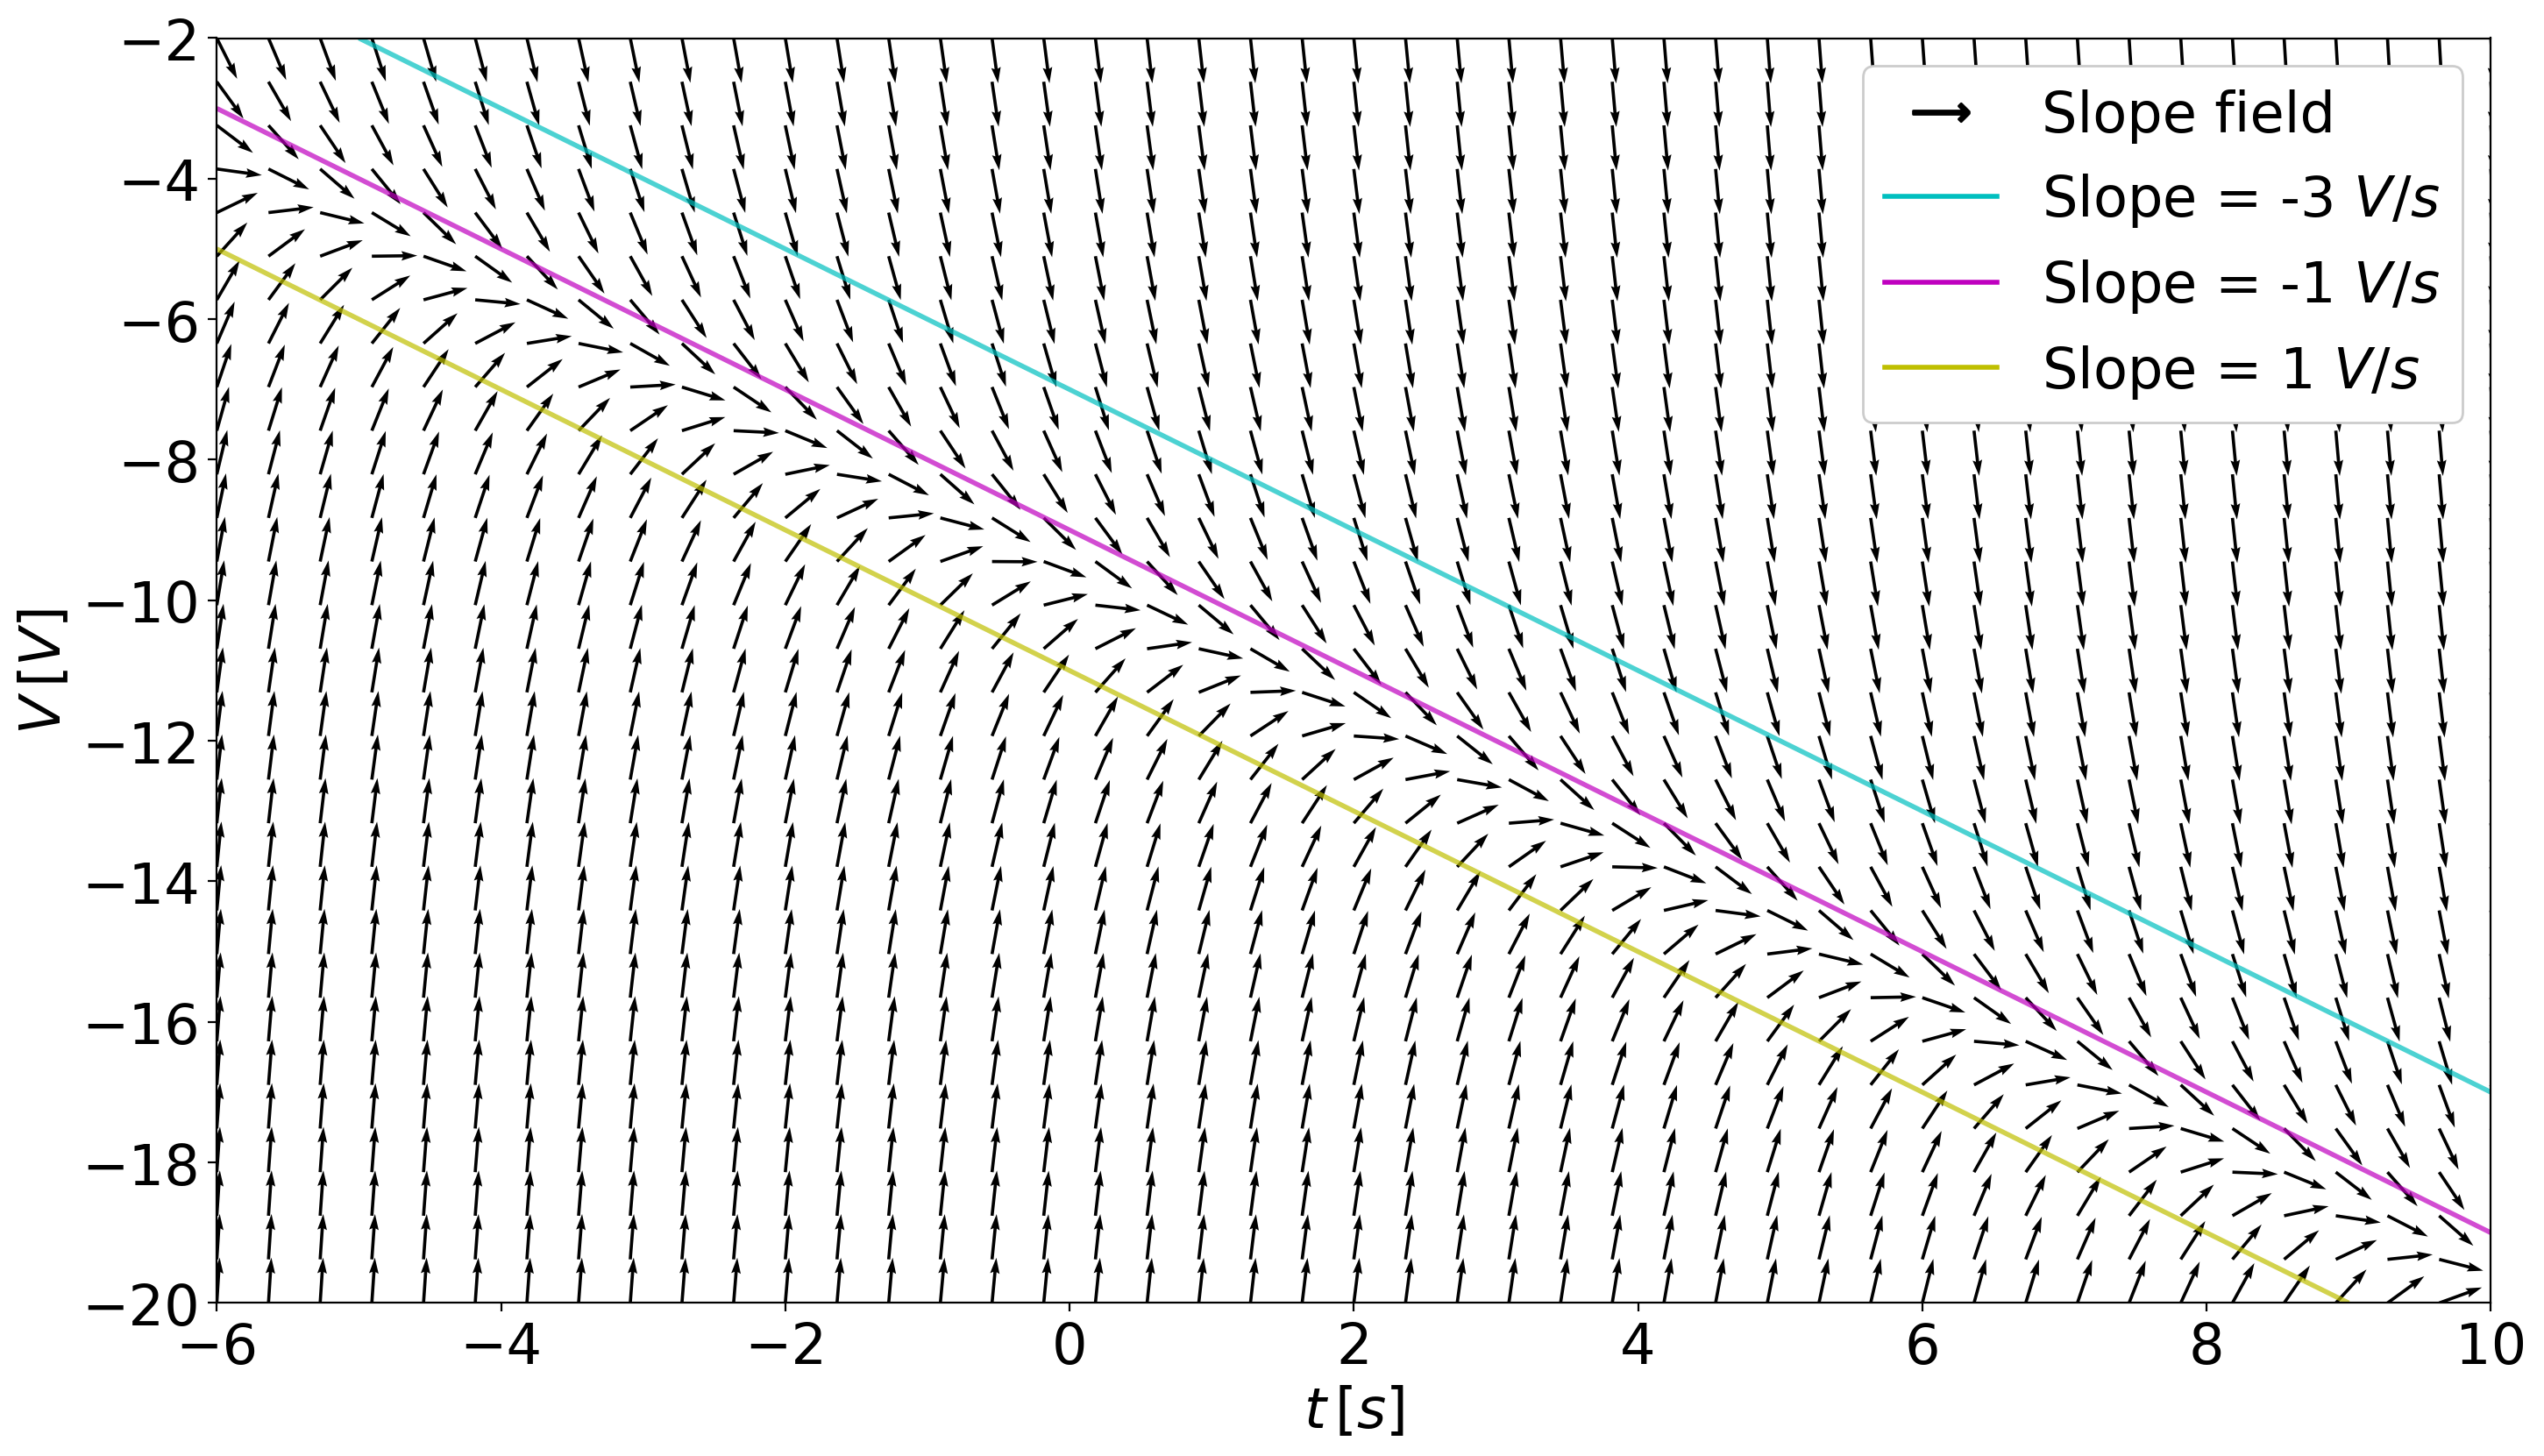

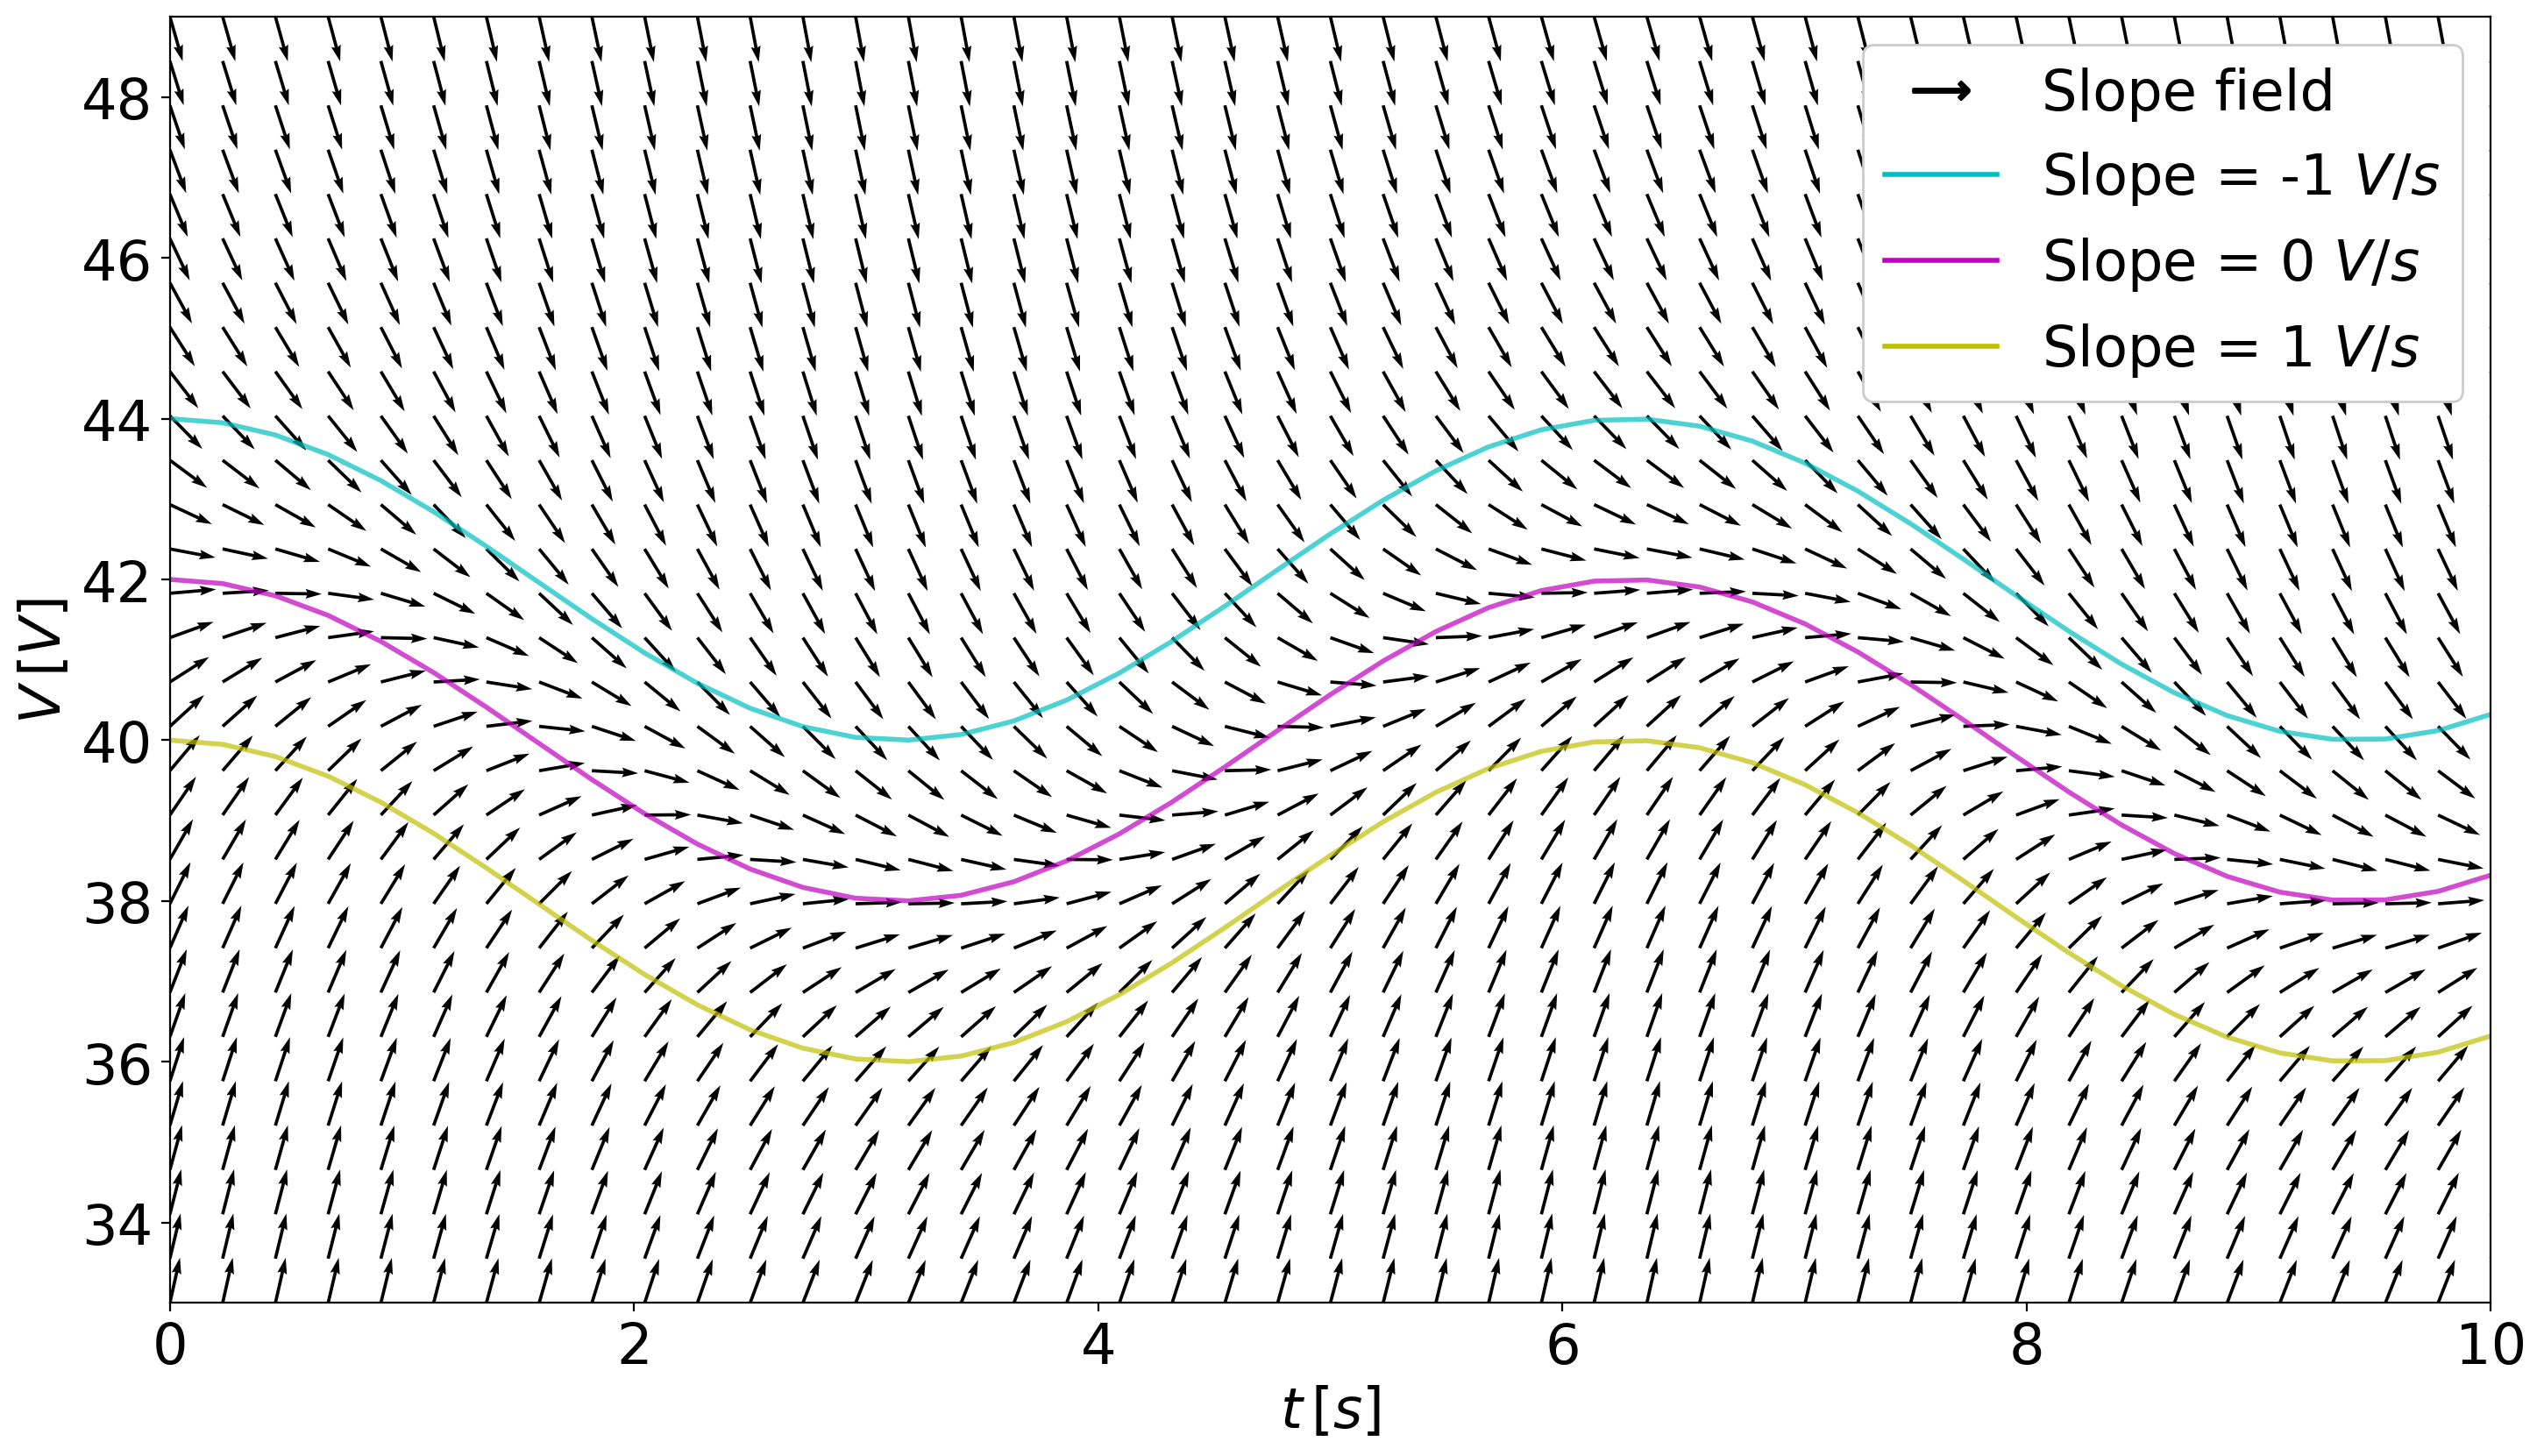

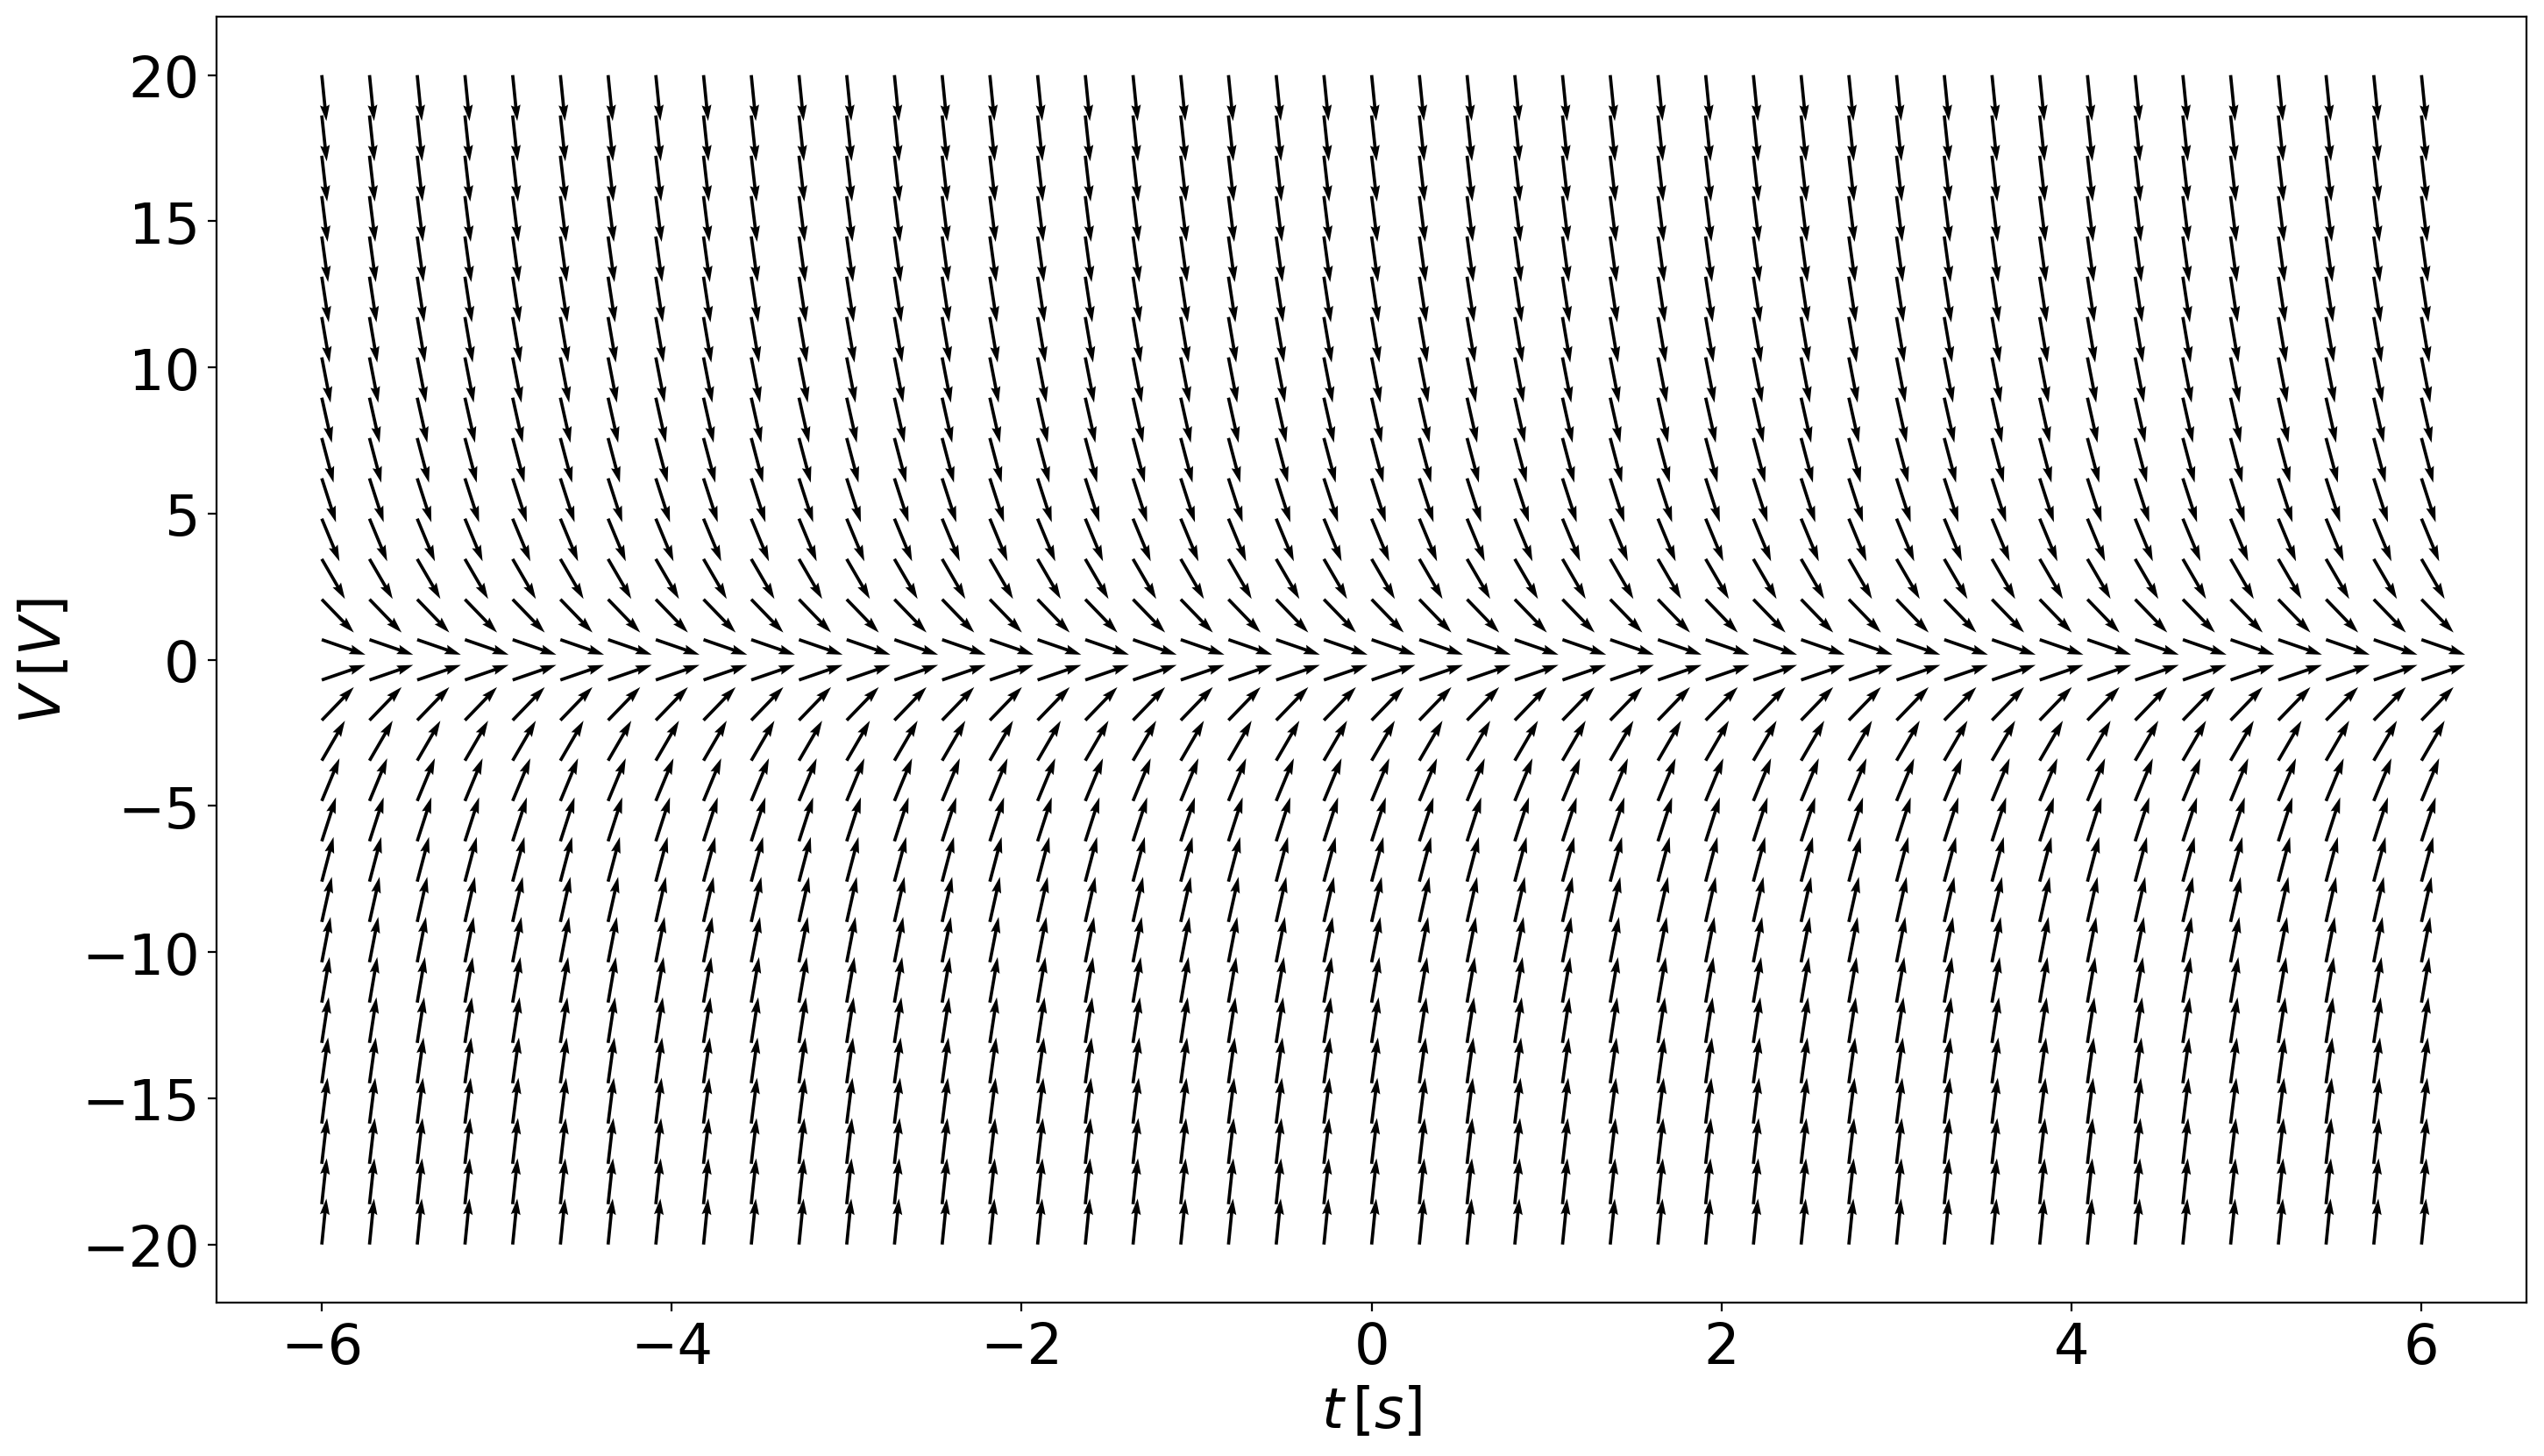

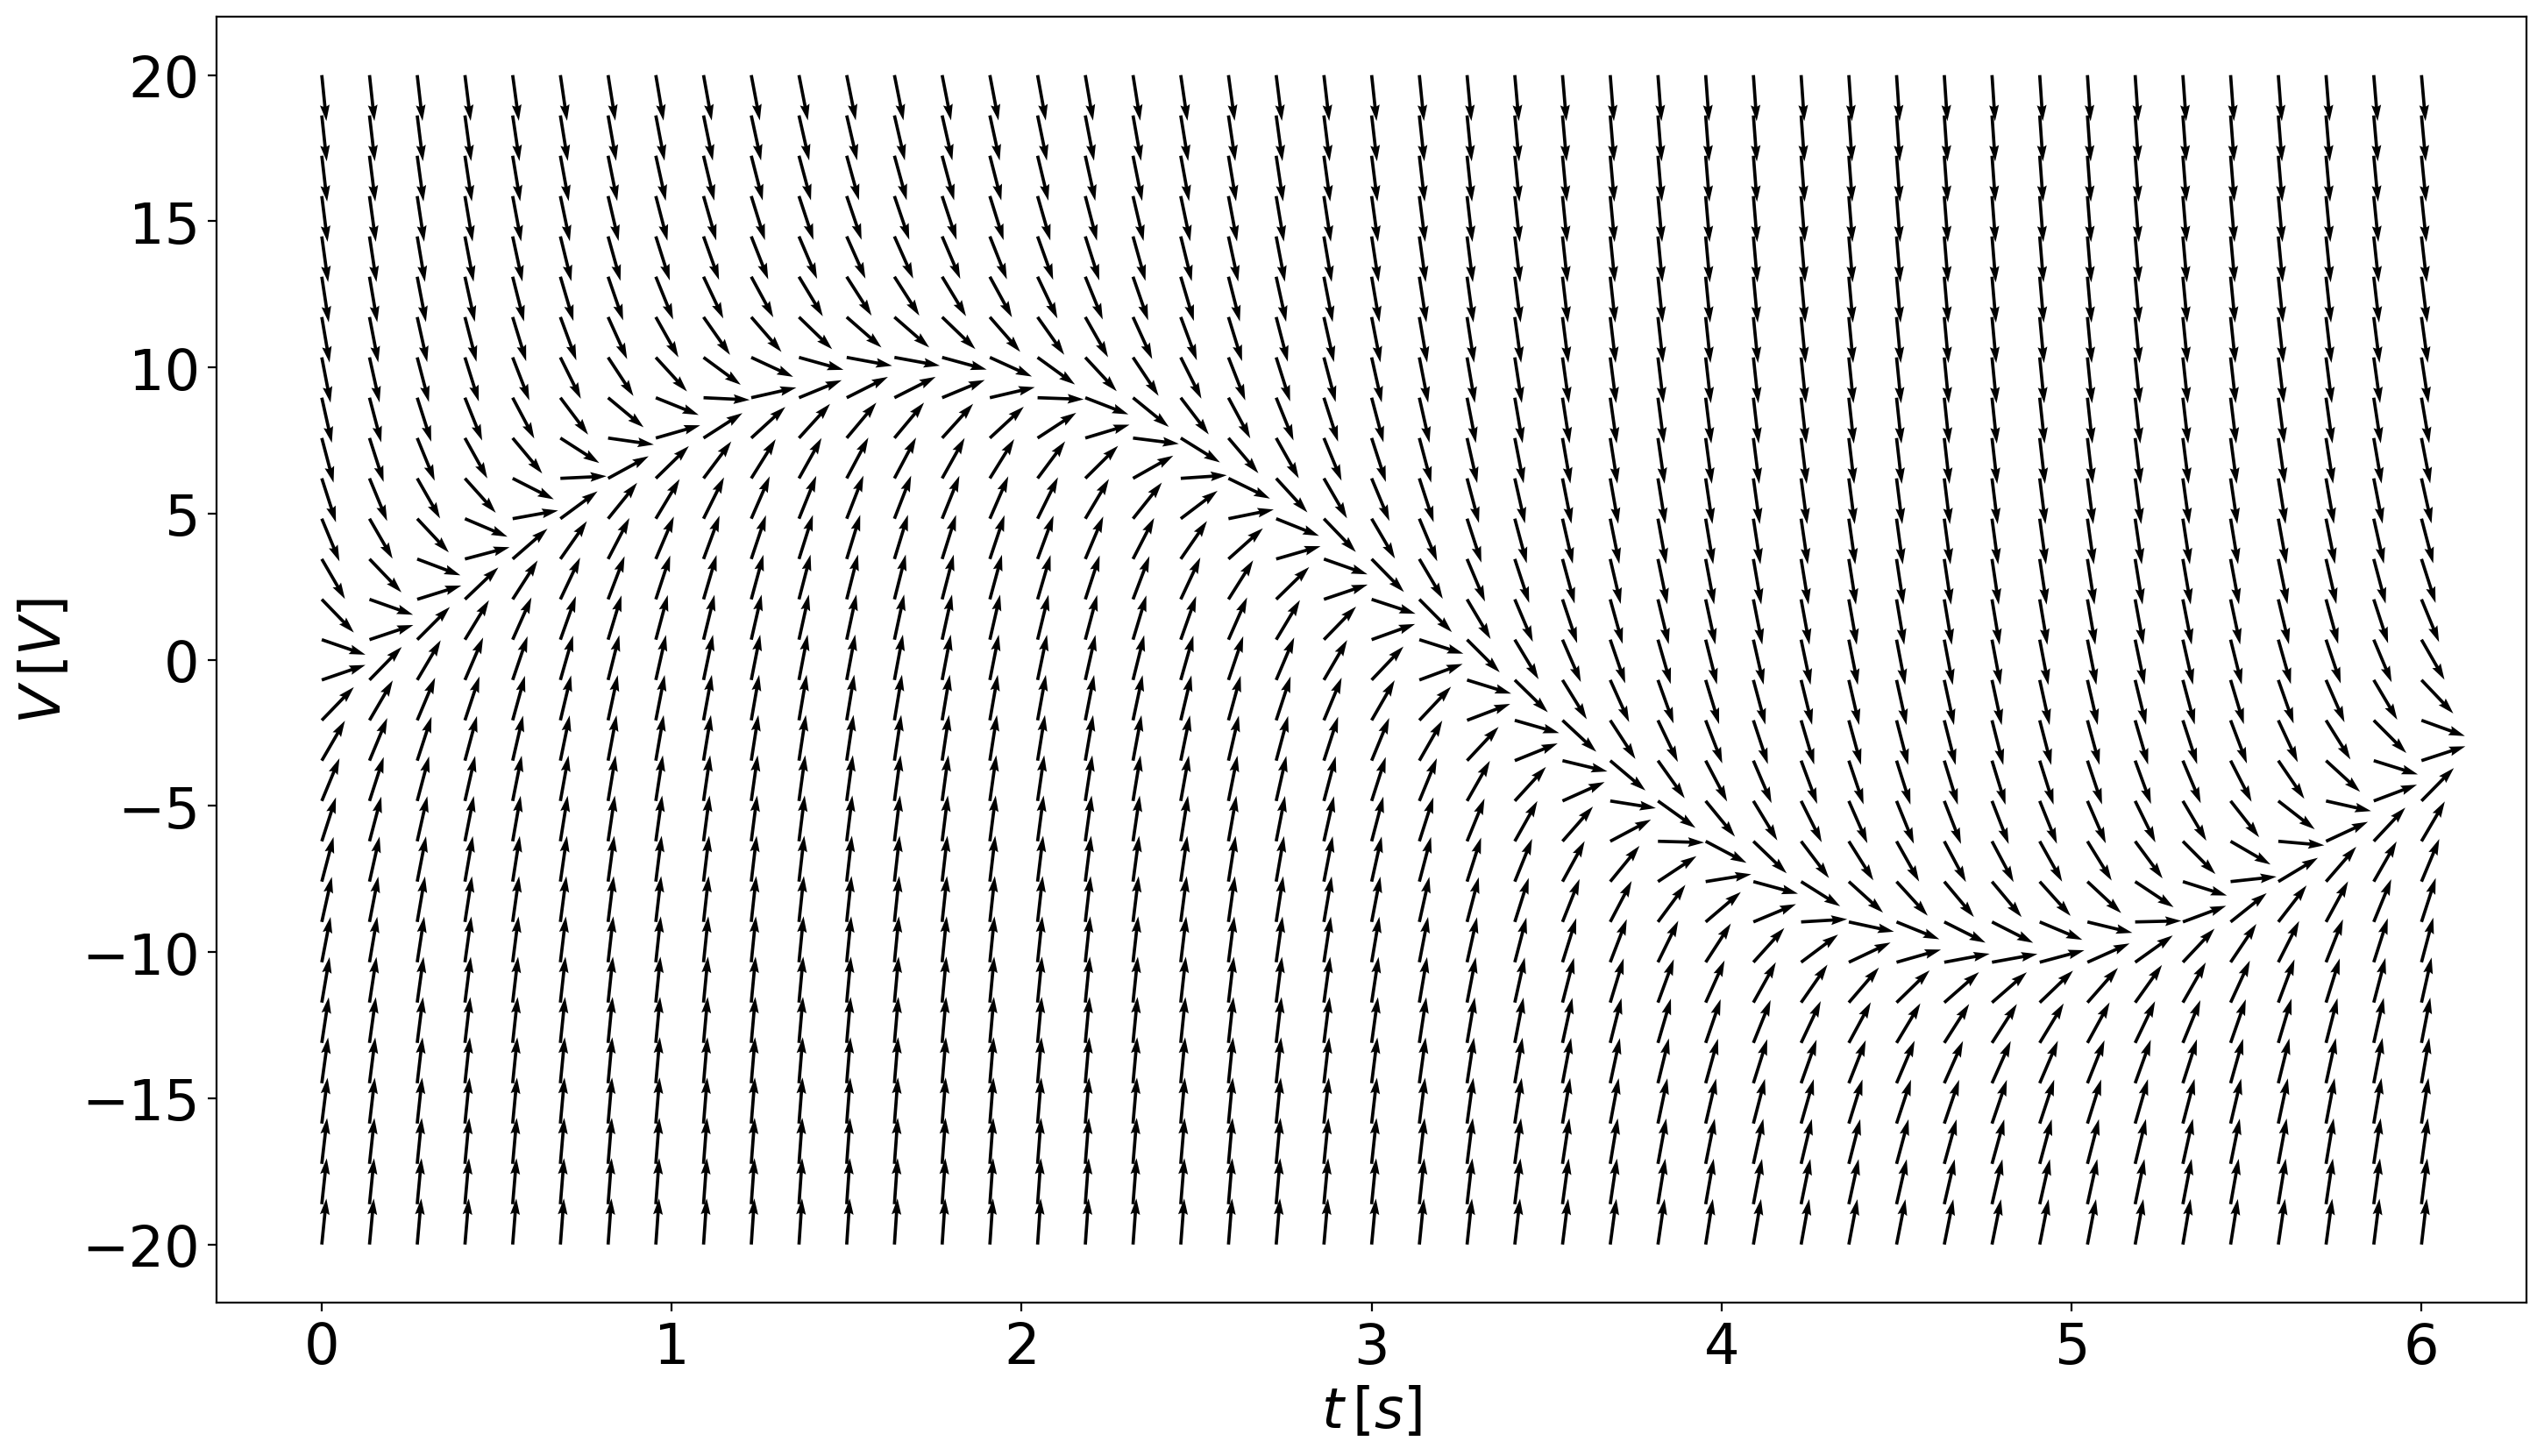

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib.legend_handler import HandlerLine2D

#Lambdafunction:
f1 = lambda V , t: -10 -V -t 
f1.__name__ = 'f1'
f2 = lambda V , t:  np.cos(t) - 0.5*V + 20
f2.__name__ = 'f2'
f3 = lambda V , t:  -0.5*V
f3.__name__ = 'f3'
f4 = lambda V , t:  (1/2)*(10*np.sin(t)-(V/1))
f4.__name__ = 'f4'
f5 = lambda V , t:  0.5*(5-V)
f5.__name__ = 'f5'
f6 = lambda V , t:  (1/2)*(10*np.sin(t)-(V/1)+5)
f6.__name__ = 'f6'
#Slopefield:
plt.rcParams.update({'font.size': 23})
plt.rcParams["figure.dpi"] = 200
plt.rcParams['figure.figsize'] = [7.5*2,8.8]

def slopefieldplot(function,min_y,max_y,min_x,max_x,arr_num_v,arr_num_t,x_label,y_label,isoclines, colors,plt_iso):
    v = np.linspace(min_y,max_y,arr_num_v) #Voltage vector
    t = np.linspace(min_x,max_x,arr_num_t) #Time vector
    delta_t = (max(t)-min(t))/30 #deltay for slope vectors
    t_grid,v_grid = np.meshgrid(t,v)#create time and voltage mesh
    lng = np.sqrt((function(v_grid,t_grid)*delta_t)**2+(delta_t)**2) #length of the original slope vectors
    dt = delta_t / lng #scale the horizontal component to uniform length
    dv = function(v_grid,t_grid)*delta_t / lng #scale the vertical component to uniform length
    plt.quiver(t,v,dt,dv,scale=50, width=0.0014, label="slope field") #Plot the slope field

    if plt_iso == 1:
        plt.contour(t, v, function(v_grid, t_grid), colors=colors, levels=isoclines, linewidths=2, alpha=0.7)
        isocline1 = lines.Line2D([], [], color=colors[0], linewidth=2, label=f'Slope = {isoclines[0]} $V/s$')
        isocline2 = lines.Line2D([], [], color=colors[1], linewidth=2, label=f'Slope = {isoclines[1]} $V/s$')
        isocline3 = lines.Line2D([], [], color=colors[2], linewidth=2, label=f'Slope = {isoclines[2]} $V/s$')
        arrow = lines.Line2D([], [], color="black", marker=r'$\longrightarrow$', markersize=23, linestyle="", linewidth=2, label="Slope field")
        
        plt.legend(loc=1, handles=[arrow, isocline1, isocline2, isocline3],framealpha=1) 
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.savefig(f"slope_field_{function.__name__}.pdf")
    plt.show()
    
slopefieldplot(f1,-20,-2,-6,10,30,45,"$t\,[s]$","$V\,[V]$",[-3,-1,1],["c","m","y"],1)
slopefieldplot(f2,33,49,0,10,30,45,"$t\,[s]$","$V\,[V]$",[-1,0,1],["c","m","y"],1)
slopefieldplot(f3,-20,20,-6,6,30,45,"$t\,[s]$","$V\,[V]$",[],[],0)
slopefieldplot(f4,-20,20,0,6,30,45,"$t\,[s]$","$V\,[V]$",[],[],0)
slopefieldplot(f5,-20,20,0,6,30,45,"$t\,[s]$","$V\,[V]$",[],[],0)
slopefieldplot(f6,-20,20,0,6,30,45,"$t\,[s]$","$V\,[V]$",[],[],0)

